# **ASSIGNMENT 1 - LOGISTIC REGRESSION**

I have taken help through the following sources on the internet :


*   https://www.youtube.com/watch?v=JDU3AzH3WKg
*   https://www.youtube.com/watch?v=VCJdg7YBbAQ
*   https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2
 






## **Importing Libraries**










In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## **Importing Datasets**

In [ ]:
dtrain=pd.read_csv('train.csv')

In [ ]:
print(dtrain.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500


In [ ]:
dtest=pd.read_csv('test.csv')

In [ ]:
print(dtest.head())

   PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch     Fare
0          621         0       3  male  27.0      1      0  14.4542
1          622         1       1  male  42.0      1      0  52.5542
2          623         1       3  male  20.0      1      1  15.7417
3          624         0       3  male  21.0      0      0   7.8542
4          625         0       3  male  21.0      0      0  16.1000


In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


## **Analysing relationships between the output label and features**

Idea taken from : https://www.youtube.com/watch?v=VCJdg7YBbAQ

In [ ]:
dtrain['Survived'].value_counts()

0    376
1    244
Name: Survived, dtype: int64



*   Survived : 244
*   Not Survived : 376



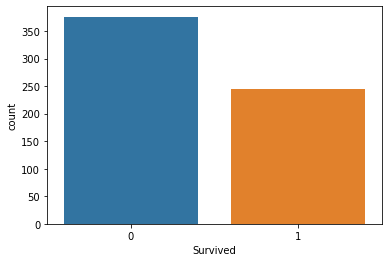

In [ ]:
sn.countplot(x="Survived",data=dtrain)
plt.show()

### Survival Stats in different passenger classes 

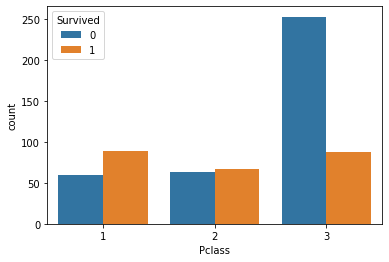

In [ ]:
sn.countplot(x="Pclass",hue="Survived",data=dtrain)
plt.show()

### Histogram depicting different ages of people

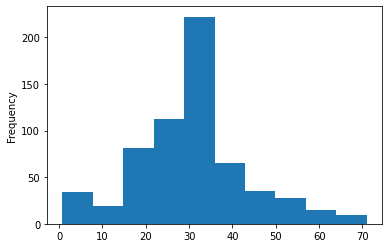

In [ ]:
dtrain['Age'].plot.hist()
plt.show()

### Survival stats for male and female passengers

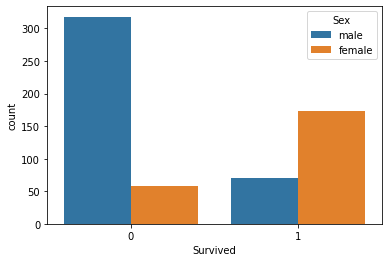

In [ ]:
sn.countplot(x="Survived",hue="Sex",data=dtrain)
plt.show()

## **Data Wrangling**

In [ ]:
dtest['Age'].fillna(dtest['Age'].mean(),inplace = True)

dtrain['Age'].fillna(dtrain['Age'].mean(),inplace = True)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
x=dtrain.drop("Survived",axis=1)
x=dtrain.drop("PassengerId",axis=1)
y=dtrain["Survived"]



x1=dtest.drop("Survived",axis=1)
x1=dtest.drop("PassengerId",axis=1)
y1=dtest["Survived"]
print(x1.shape)
x1['Sex']=x1['Sex'].replace(['male','female'],[0,1])
x['Sex']=x['Sex'].replace(['male','female'],[0,1])
print(x.head())

(271, 7)
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [ ]:
print(x.shape)
print(x.isnull().values.any())
#x.dropna(inplace=True)
print(x.isnull().values.any())

(620, 7)
False
False


In [ ]:
ns,nf=x.shape
print(ns,nf)
type(ns)

620 7


int

## **Training our Model**

In [ ]:
#Training
weights=np.random.randn(nf)    #initialising weights with random values
print(weights.shape)            
print(x.shape)
b=0 #initialising bias

rate=0.001          #learning rate
epoch=50000         #total iterations

for iteration in range(epoch):
  inp=np.dot(x,weights)+b   #Finding input value to the sigmoid function 

  y_pred=sigmoid(inp)       #predicted value of input , lies in (0,1)
  
  dw= (1/ns)*(np.dot(x.T, (y_pred - y)))    #
  db=(1/ns)*np.sum(y_pred-y)

  weights-=dw*rate      #updating weights
  b-=db*rate            #updating bias
  loss=np.sum(-y*np.log(y_pred)- (1-y)*np.log(1-y_pred))    #finding loss according to the formula
  loss/=ns
  
  if iteration%1000==0:
    print("Epoch :",iteration,", Loss =",loss)
  
  
  
  


(7,)
(620, 7)
Epoch : 0 , Loss = 21.618884571891055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


Epoch : 1000 , Loss = 1.182188984907052
Epoch : 2000 , Loss = 0.9540516193788193
Epoch : 3000 , Loss = 0.7658473059506816
Epoch : 4000 , Loss = 0.6143287263145539
Epoch : 5000 , Loss = 0.4958160811237985
Epoch : 6000 , Loss = 0.4075679872707515
Epoch : 7000 , Loss = 0.34609678192377674
Epoch : 8000 , Loss = 0.3049560478618714
Epoch : 9000 , Loss = 0.2765688594383784
Epoch : 10000 , Loss = 0.25535122424428647
Epoch : 11000 , Loss = 0.23833735515736812
Epoch : 12000 , Loss = 0.2240865010192828
Epoch : 13000 , Loss = 0.211838125551096
Epoch : 14000 , Loss = 0.2011336127719509
Epoch : 15000 , Loss = 0.1916637862956004
Epoch : 16000 , Loss = 0.18320434054551032
Epoch : 17000 , Loss = 0.17558519100435566
Epoch : 18000 , Loss = 0.16867383623228857
Epoch : 19000 , Loss = 0.1623651752916416
Epoch : 20000 , Loss = 0.15657470391384046
Epoch : 21000 , Loss = 0.15123370449601278
Epoch : 22000 , Loss = 0.14628572716428098
Epoch : 23000 , Loss = 0.1416839603505384
Epoch : 24000 , Loss = 0.13738923807

## **Prediction over test dataset**

In [ ]:
#Prediction
test = np.dot(x1,weights)+b  
y_pred1 = sigmoid(test)       #predicting over test dataset with calculated weights and bias
out=[]                        #creating an empty list
for i in y_pred1:
  if(i>0.5):                  #Similar to probability , if sigmoid returns >0.5 then survived else not survived
    out.append(1)
  else:
    out.append(0)
print(y_pred1.shape)
print(np.array(out))
out[268]
v=y1.to_numpy()
#print(v)

(271,)
[0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 0]


## **Calculating Accuracy & F1 score**

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
#plt.scatter(x1,y1,'r')
#plt.scatter(x1,out,'b')
#plt.show()
print("The accuracy obtained after testing :" ,accuracy(y1,out)*100)


The accuracy obtained after testing : 100.0


In [ ]:
def compute(y1,y2):
  tneg=0          #true negative ( expected value = 0 and predicted value=0 )
  tpos=0          #true positive ( expected value = 1 and predicted value=1 )
  fpos=0          #false positive ( expected value = 0 and predicted value=1 )
  fneg=0          #false negative ( expected value = 1 and predicted value=0 )
  for i in range(271):
    
    if(y1[i]==0 and y2[i]==0):
      tneg+=1
    elif(y1[i]==0 and y2[i]==1):
      fpos+=1
    elif(y1[i]==1 and y2[i]==0):
      fneg+=1
    else:
      tpos+=1

  return tpos,tneg,fpos,fneg

def precision(true_positive,false_positive):
  return (true_positive*100)/(true_positive+false_positive)
def recall(true_positive,false_negative):
  return (true_positive*100)/(true_positive+false_negative)
def f1_score(precision,recall):
  return (2*(precision*recall))/(precision+recall)

In [ ]:
#Finding out values
true_positive , true_negative , false_positive , false_negative = compute(v,out)[0] , compute(v,out)[1] , compute(v,out)[2] , compute(v,out)[3]
precision = precision(true_positive , false_positive)   #Calculating precision
recall=recall(true_positive,false_negative)           #Calculating recall
print("F1 Score is : ",f1_score(precision,recall))

F1 Score is :  100.0
